In [1]:
import pandas as pd
import numpy as np
import os

# Set working dir to project root dir
os.chdir(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(f"Changed working directory to: {os.getcwd()}")

# Set abs path to data
project_root = "/Users/oliulv/Documents/foak"
data_path = os.path.join(project_root, "data", "DOGEUSDT_1h_1h-pump05_190705_250302.csv")

# Load data into df
df = pd.read_csv(data_path, parse_dates=["timestamp"])
df.head()

Changed working directory to: /Users/oliulv/Documents/foak


,timestamp,open,high,low,close,volume,num_trades,taker_buy_base,taker_buy_quote,label,...,volatility_cluster,buy_sell_ratio,bid_ask_spread,depth_imbalance,fractal_dimension,fib_retrace_38,fib_retrace_50,order_flow_imbalance,rolling_kurtosis,lunar_phase
0,2019-07-05 12:00:00,0.004490,0.004600,0.003760,0.003925,949430724.0,6487.0,405745505.0,1.649312e+06,0,...,NaN,0.746288,0.214018,0.427357,NaN,NaN,NaN,-0.145287,NaN,0.172414
1,2019-07-05 13:00:00,0.003915,0.003928,0.003765,0.003835,159004267.0,1529.0,60250238.0,2.317228e+05,0,...,NaN,0.610104,0.042604,0.378922,NaN,NaN,NaN,-0.242156,NaN,0.172414
2,2019-07-05 14:00:00,0.003845,0.003920,0.003814,0.003841,105517060.0,1241.0,42778068.0,1.653082e+05,0,...,NaN,0.681842,0.027621,0.405414,NaN,NaN,NaN,-0.189172,NaN,0.172414
3,2019-07-05 15:00:00,0.003837,0.003869,0.003710,0.003738,100804728.0,1213.0,38727959.0,1.464109e+05,0,...,NaN,0.623872,0.042511,0.384188,NaN,NaN,NaN,-0.231624,NaN,0.172414
4,2019-07-05 16:00:00,0.003728,0.003734,0.003636,0.003666,120261079.0,1416.0,47732810.0,1.756516e+05,0,...,NaN,0.658127,0.026566,0.396910,NaN,NaN,NaN,-0.206180,NaN,0.172414


In [2]:
from utils.model.model_manager import ModelManager

# Init manager
symbol = "DOGEUSDT"
start_date = "2019-07-05"
end_date = "2025-03-02"
manager = ModelManager(symbol, start_date, end_date)

# Load data into manager
manager.load_data(data_path)

# Prepare and split data
test_window_days = 30
manager.split_data(test_window_days)

🕵️♂️ Dataset loaded successfully
📊 Data split completed


(           open      high       low     close       volume  num_trades  \
 0      0.004490  0.004600  0.003760  0.003925  949430724.0      6487.0   
 1      0.003915  0.003928  0.003765  0.003835  159004267.0      1529.0   
 2      0.003845  0.003920  0.003814  0.003841  105517060.0      1241.0   
 3      0.003837  0.003869  0.003710  0.003738  100804728.0      1213.0   
 4      0.003728  0.003734  0.003636  0.003666  120261079.0      1416.0   
 ...         ...       ...       ...       ...          ...         ...   
 48827  0.334750  0.335300  0.332880  0.334840   15861446.0     30370.0   
 48828  0.334840  0.335170  0.330470  0.331010   33171249.0     59637.0   
 48829  0.331000  0.332440  0.330950  0.331750   20071429.0     25851.0   
 48830  0.331740  0.333630  0.331110  0.332080   13939056.0     17093.0   
 48831  0.332080  0.333530  0.331110  0.331530   14071275.0     25561.0   
 
        taker_buy_base  taker_buy_quote    1m_roc  30m_volatility  ...  \
 0         405745505.0  

In [3]:
# Config model with default params
manager.configure_model()

# Fit and evaluate model on data
manager.fit_and_evaluate()

# Tune threshold
manager.tune_threshold(min_recall=0.6, min_precision=0.7)


🏋️ Training model...

🎯 Tuning threshold...
Optimal threshold: 0.9879


np.float64(0.9878795607977963)

In [4]:
# Get and print merics
metrics = manager.get_metrics()
print(metrics)


📊 Model Performance Report
Optimal Threshold: 0.9879
AUC-ROC Score: 0.9620

Overall Metrics:
Accuracy:  0.7587
Precision: 0.8514
Recall:    0.7587
F1-Score:  0.7578

Class 0 Metrics:
Precision: 0.6159
Recall:    1.0000
F1-Score:  0.7623

Class 1 Metrics:
Precision: 1.0000
Recall:    0.6063
F1-Score:  0.7549

Using raw probabilities
Classification threshold: 0.9879
{'accuracy': 0.7586685159500693, 'precision': 0.8513653773732216, 'recall': 0.7586685159500693, 'f1': 0.7577797518838961, 'auc_roc': np.float64(0.9619520264681554), 'optimal_threshold': np.float64(0.9878795607977963), 'precision_0': 0.6158940397350994, 'recall_0': 1.0, 'f1_0': 0.7622950819672131, 'precision_1': 1.0, 'recall_1': 0.6063348416289592, 'f1_1': 0.7549295774647887}



🎯 Generating SHAP analysis...


/Users/oliulv/Documents/foak/venv/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')



📉 Bottom 20 features by SHAP importance:
Bottom 20 features explain 1.74% of total SHAP value magnitude
Top 20 features explain 90.70% of total SHAP value magnitude
Ratio (Top/Bottom): 52.10x


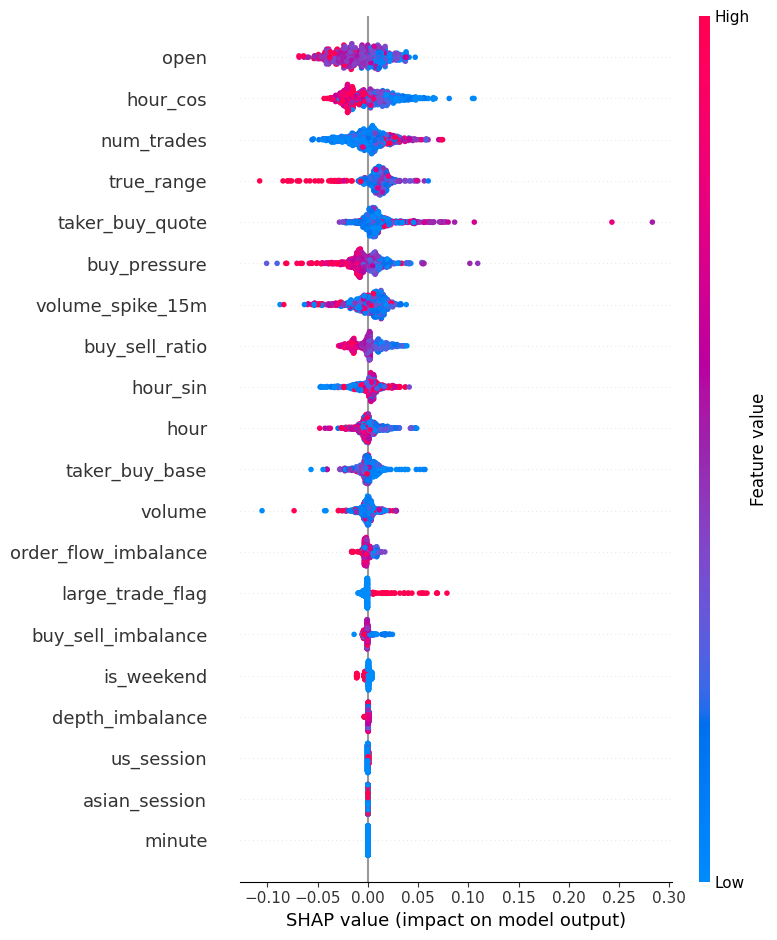

In [5]:
manager.plot_shap_analysis(show_bottom=True, n_features=20)


📈 Plotting feature importance...

📉 Bottom 20 features contribution:
Bottom 20 features explain 4.54% of total importance
Top 20 features explain 80.64% of total importance
Ratio (Top/Bottom): 17.77x


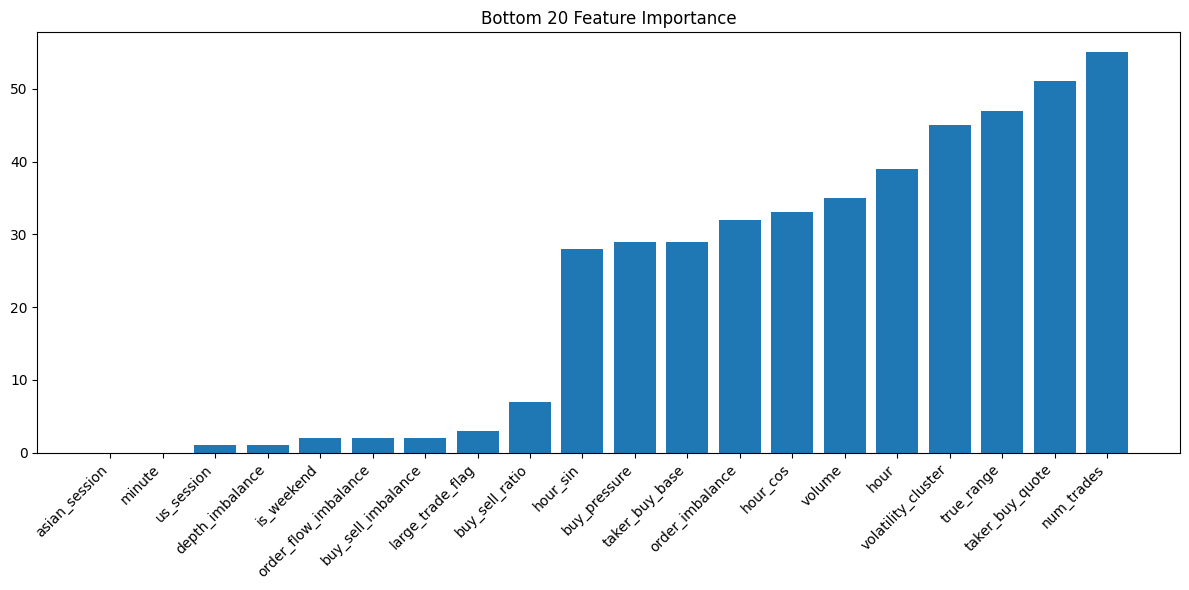

In [6]:
manager.plot_feature_importance(show_bottom=True, n_features=20)

In [ ]:
from utils.model.walk_forward import WalkForwardAnalyzer

# Store org params for logging
org_params = manager.model.get_params()

# Init wf
wf = WalkForwardAnalyzer(
    0.3,
    0.07,
    manager.optimal_threshold)

# Config wf model
manager.configure_walk_forward_model()

# Define features
X = manager.df.drop(columns=["label"])
y = manager.df["label"]

# wf validation
predictions, true_labels, metrics_history = wf.validate(
    manager.model,
    X,
    y)


In [ ]:
wf.plot_metrics_over_time()

In [ ]:
# Initialize Experiment Tracker
from utils.model.experiment_tracker import ExperimentTracker

with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="1h",
        target_variable="1h-pump05",
        hyperparameters=org_params,
        features=manager.X_train.columns.tolist()
    )

    # Log experiment results
    tracker.log_results(experiment, metrics, test_window_days)

    # Log wf val results
    tracker.log_walk_forward_results(experiment, metrics_history, 0.3, 0.07)